# Predicción de precio de celulares

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
import shap
import math
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) # visualizar todas las columnas
pd.set_option('display.max_rows', None) # visualizar todas las filas

## Cargando el dataset

In [2]:
df = pd.read_csv('mobiles.csv')
df.head()

,Unnamed: 0,Brand,Title,Model Name,Model Number,Price,Rating,No_of_Ratings,No_of_Reviews,In The Box,Color,Browse Type,SIM Type,Hybrid Sim Slot,Touchscreen,OTG Compatible,Quick Charging,Sound Enhancements,Display_size_cm,Display_size_inches,Resolution,Resolution Type,Display Type,Other Display Features,Operating System,Processor Type,Processor Core,Operating Frequency,Internal Storage,Primary Camera Available,Primary Camera,Primary Camera Features,Secondary Camera Available,Secondary Camera,Secondary Camera Features,Flash,HD Recording,Full HD Recording,Video Recording,Video Recording Resolution,Digital Zoom,Frame Rate,Dual Camera Lens,Call Wait/Hold,Network Type,Supported Networks,Internet Connectivity,3G,Pre-installed Browser,Bluetooth Support,Bluetooth Version,Wi-Fi,Wi-Fi Version,Wi-Fi Hotspot,NFC,EDGE,Map Support,GPS Support,Smartphone,SIM Size,Mobile Tracker,Removable Battery,SMS,Graphics PPI,Sensors,Browser,Other Features,GPS Type,Video Formats,Battery Capacity,Width,Height,Depth,Weight
0,0,APPLE,"APPLE iPhone 13 (Pink, 128 GB)",iPhone 13,MLPH3HN/A,52499,4.7,259109.0,12745.0,"iPhone, USB-C to Lightning Cable, Documentation",Pink,Smartphones,Dual Sim,No,Yes,No,Yes,"Dolby Digital (AC‑3), Dolby Digital Plus (E‑AC...",15.49,6.10,2532 x 1170 Pixels,Super Retina XDR Display,Super Retina XDR,"Super Retina XDR Display, 6.1‑inch (Diagonal) ...",iOS 15,A15 Bionic Chip,Hexa Core,"2G GSM/EDGE: 850, 900, 1800, 1900 MHz, 3G UMTS...",128 GB,Yes,12MP + 12MP,"Dual 12MP Camera System (Wide and Ultra Wide),...",Yes,12MP Front Camera,"12MP TrueDepth Camera, f/2.2 Aperture, Portrai...",Rear: True Tone Flash with Slow Sync | Front: ...,Yes,Yes,Yes,"4K Video Recording (at 24 fps, 25 fps, 30 fps ...","Photo: Digital Zoom Upto 5x, Video: Digital Zo...","24 fps, 25 fps, 30 fps, 60 fps",Primary Camera,Yes,"5G, 4G, 3G, 2G","5G, 4G VoLTE, 4G LTE, UMTS, GSM","5G, 4G, 3G, Wi-Fi, EDGE",Yes,Safari,Yes,v5.0,Yes,Wi-Fi 6 (802.11ax) with 2x2 MIMO,Yes,Yes,Yes,Maps,Yes,Yes,Nano + eSIM,Yes,No,Yes,460 PPI,"Face ID, Barometer, Three‑axis Gyro, Accelerom...",Safari,"Splash, Water and Dust Resistant IP68 Rated (M...","Built-in GPS, GLONASS, Galileo, QZSS and BeiDou","HEVC, H.264, MPEG‑4 Part 2 and Motion JPEG, HD...",3240 mAh,71.5 mm,146.7 mm,7.65 mm,173 g
1,1,POCO,"POCO C51 (Power Black, 64 GB)",C51,MZB0E6DIN,6499,4.1,78642.0,4449.0,"Handset, 10W Adapter, USB Cable, Sim Eject Too...",Power Black,Smartphones,Dual Sim,No,Yes,Yes,Yes,NaN,16.56,6.52,1600 x 720 Pixels,HD+,HD+ Scratch Resistant Display,"120Hz Touch Sampling Rate, Brightness: 400nits",Android 13,Helio G36,Octa Core,"2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B5/B8, 4G LT...",64 GB,Yes,8MP Dual Rear Camera,"8MP AI Dual Camera: (f/2.0 Aperture), Camera F...",Yes,5MP Front Camera,5MP Front Camera,Rear Flash,Yes,Yes,Yes,"Rear Camera: 1080p (at 30 fps), 720p (at 30 fp...",Yes,60 Hz,Primary Camera,Yes,"2G, 3G, 4G, 4G VOLTE","4G LTE, 4G VoLTE, GSM, WCDMA","4G, 3G, Wi-Fi, EDGE, GPRS",Yes,NaN,Yes,v5.0,Yes,802.11 b/g/n,Yes,No,Yes,Google Maps,Yes,Yes,Nano Sim,NaN,No,Yes,NaN,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",NaN,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
2,2,OnePlus,"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",Nord CE 2 Lite 5G,CPH2381/CVD,17196,4.4,110949.0,7728.0,"Phone,SIM Tray Ejector, Adapter, Phone Case, U...",Black Dusk,Smartphones,Dual Sim,No,Yes,No,NaN,NaN,16.74,6.59,2412 x 1080 Pixels,NaN,NaN,NaN,Android 13,NaN,Octa Core,NaN,128 GB,NaN,64MP Rear Camera,NaN,NaN,16MP Front Camera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,5G,5G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Nano Sim,NaN,No,Yes,NaN,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",NaN,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
3,3,realme,"realme 11x 5G (Purple Dawn, 128 GB)",11x 5G,RMX3785,15999,4.3,2633.0,220.0,"Handset, Adapter, USB Cable, Important Info Bo...",Purple Dawn,

## Información del dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 74 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  984 non-null    int64  
 1   Brand                       984 non-null    object 
 2   Title                       984 non-null    object 
 3   Model Name                  984 non-null    object 
 4   Model Number                979 non-null    object 
 5   Price                       984 non-null    int64  
 6   Rating                      984 non-null    float64
 7   No_of_Ratings               960 non-null    float64
 8   No_of_Reviews               960 non-null    float64
 9   In The Box                  983 non-null    object 
 10  Color                       984 non-null    object 
 11  Browse Type                 984 non-null    object 
 12  SIM Type                    984 non-null    object 
 13  Hybrid Sim Slot             979 non

In [4]:
print(f'El dataframe contiene {df.shape[0]} filas y {df.shape[1]} columnas')

El dataframe contiene 984 filas y 74 columnas


## Procesamiento del dataframe

In [5]:
# eliminando columnas innecesarias
df.drop(columns = ['Unnamed: 0', 'Title', 'Model Number'], inplace=True)
df.head()

,Brand,Model Name,Price,Rating,No_of_Ratings,No_of_Reviews,In The Box,Color,Browse Type,SIM Type,Hybrid Sim Slot,Touchscreen,OTG Compatible,Quick Charging,Sound Enhancements,Display_size_cm,Display_size_inches,Resolution,Resolution Type,Display Type,Other Display Features,Operating System,Processor Type,Processor Core,Operating Frequency,Internal Storage,Primary Camera Available,Primary Camera,Primary Camera Features,Secondary Camera Available,Secondary Camera,Secondary Camera Features,Flash,HD Recording,Full HD Recording,Video Recording,Video Recording Resolution,Digital Zoom,Frame Rate,Dual Camera Lens,Call Wait/Hold,Network Type,Supported Networks,Internet Connectivity,3G,Pre-installed Browser,Bluetooth Support,Bluetooth Version,Wi-Fi,Wi-Fi Version,Wi-Fi Hotspot,NFC,EDGE,Map Support,GPS Support,Smartphone,SIM Size,Mobile Tracker,Removable Battery,SMS,Graphics PPI,Sensors,Browser,Other Features,GPS Type,Video Formats,Battery Capacity,Width,Height,Depth,Weight
0,APPLE,iPhone 13,52499,4.7,259109.0,12745.0,"iPhone, USB-C to Lightning Cable, Documentation",Pink,Smartphones,Dual Sim,No,Yes,No,Yes,"Dolby Digital (AC‑3), Dolby Digital Plus (E‑AC...",15.49,6.10,2532 x 1170 Pixels,Super Retina XDR Display,Super Retina XDR,"Super Retina XDR Display, 6.1‑inch (Diagonal) ...",iOS 15,A15 Bionic Chip,Hexa Core,"2G GSM/EDGE: 850, 900, 1800, 1900 MHz, 3G UMTS...",128 GB,Yes,12MP + 12MP,"Dual 12MP Camera System (Wide and Ultra Wide),...",Yes,12MP Front Camera,"12MP TrueDepth Camera, f/2.2 Aperture, Portrai...",Rear: True Tone Flash with Slow Sync | Front: ...,Yes,Yes,Yes,"4K Video Recording (at 24 fps, 25 fps, 30 fps ...","Photo: Digital Zoom Upto 5x, Video: Digital Zo...","24 fps, 25 fps, 30 fps, 60 fps",Primary Camera,Yes,"5G, 4G, 3G, 2G","5G, 4G VoLTE, 4G LTE, UMTS, GSM","5G, 4G, 3G, Wi-Fi, EDGE",Yes,Safari,Yes,v5.0,Yes,Wi-Fi 6 (802.11ax) with 2x2 MIMO,Yes,Yes,Yes,Maps,Yes,Yes,Nano + eSIM,Yes,No,Yes,460 PPI,"Face ID, Barometer, Three‑axis Gyro, Accelerom...",Safari,"Splash, Water and Dust Resistant IP68 Rated (M...","Built-in GPS, GLONASS, Galileo, QZSS and BeiDou","HEVC, H.264, MPEG‑4 Part 2 and Motion JPEG, HD...",3240 mAh,71.5 mm,146.7 mm,7.65 mm,173 g
1,POCO,C51,6499,4.1,78642.0,4449.0,"Handset, 10W Adapter, USB Cable, Sim Eject Too...",Power Black,Smartphones,Dual Sim,No,Yes,Yes,Yes,NaN,16.56,6.52,1600 x 720 Pixels,HD+,HD+ Scratch Resistant Display,"120Hz Touch Sampling Rate, Brightness: 400nits",Android 13,Helio G36,Octa Core,"2G GSM: B2/B3/B5/B8, 3G WCDMA: B1/B5/B8, 4G LT...",64 GB,Yes,8MP Dual Rear Camera,"8MP AI Dual Camera: (f/2.0 Aperture), Camera F...",Yes,5MP Front Camera,5MP Front Camera,Rear Flash,Yes,Yes,Yes,"Rear Camera: 1080p (at 30 fps), 720p (at 30 fp...",Yes,60 Hz,Primary Camera,Yes,"2G, 3G, 4G, 4G VOLTE","4G LTE, 4G VoLTE, GSM, WCDMA","4G, 3G, Wi-Fi, EDGE, GPRS",Yes,NaN,Yes,v5.0,Yes,802.11 b/g/n,Yes,No,Yes,Google Maps,Yes,Yes,Nano Sim,NaN,No,Yes,NaN,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",NaN,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
2,OnePlus,Nord CE 2 Lite 5G,17196,4.4,110949.0,7728.0,"Phone,SIM Tray Ejector, Adapter, Phone Case, U...",Black Dusk,Smartphones,Dual Sim,No,Yes,No,NaN,NaN,16.74,6.59,2412 x 1080 Pixels,NaN,NaN,NaN,Android 13,NaN,Octa Core,NaN,128 GB,NaN,64MP Rear Camera,NaN,NaN,16MP Front Camera,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,5G,5G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Nano Sim,NaN,No,Yes,NaN,"Accelerometer, Fingerprint Sensor",Google Chrome,"Splash Resistant Coating, MIUI Dialer, Upto 3 ...","GPS, AGPS, GLONASS, BEIDOU",NaN,5000 mAh,76.75 mm,164.9 mm,9.09 mm,192 g
3,realme,11x 5G,15999,4.3,2633.0,220.0,"Handset, Adapter, USB Cable, Important Info Bo...",Purple Dawn,Smartphones,Dual Sim,No,Yes,Yes,NaN,"Dirac Sound Effect, Hi-Res Audio Certification",17.07,6.72,2400 x 1080 Pixels,Full HD+,Full HD+ LCD,"120Hz Refresh Rate, Aspect Ratio: 20:9, Screen...",Android 13,Dimensity 6100+,Octa Core,"2G 

In [6]:
# chequeando la cantidad de valores unicos por columnas
df.select_dtypes(include='object').nunique()

Brand                          38
Model Name                    327
In The Box                    240
Color                         376
Browse Type                     2
SIM Type                        5
Hybrid Sim Slot                 2
Touchscreen                     2
OTG Compatible                  4
Quick Charging                  2
Sound Enhancements             41
Resolution                    174
Resolution Type                16
Display Type                   76
Other Display Features        133
Operating System               59
Processor Type                125
Processor Core                  5
Operating Frequency           132
Internal Storage               29
Primary Camera Available        2
Primary Camera                 91
Primary Camera Features       162
Secondary Camera Available      2
Secondary Camera               20
Secondary Camera Features     139
Flash                          44
HD Recording                    2
Full HD Recording               2
Video Recordin

In [7]:
# cambiando los tipos de datos de las columnas numéricas de object a int y eliminando cadenas string de dichas columnas
df['Battery Capacity'] = df['Battery Capacity'].str.replace('[^0-9.]', '', regex=True)
df['Battery Capacity'] = pd.to_numeric(df['Battery Capacity'], errors='coerce')

df['Width'] = df['Width'].str.replace('[^0-9.]', '', regex=True)
df['Width'] = pd.to_numeric(df['Width'], errors='coerce')

df['Height'] = df['Height'].str.replace('[^0-9.]', '', regex=True)
df['Height'] = pd.to_numeric(df['Height'], errors='coerce')

df['Depth'] = df['Depth'].str.replace('[^0-9.]', '', regex=True)
df['Depth'] = pd.to_numeric(df['Depth'], errors='coerce')

df['Weight'] = df['Weight'].str.replace('[^0-9.]', '', regex=True)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

df['Graphics PPI'] = df['Graphics PPI'].str.replace('[^0-9.]', '', regex=True)
df['Graphics PPI'] = pd.to_numeric(df['Graphics PPI'], errors='coerce')

In [8]:
# eliminando columnas con muchos valores únicos y columnas con sólo 1 valor único
df.drop(columns = ['Model Name', 'In The Box', 'Color', 'Sound Enhancements', 'Resolution',
                   'Display Type', 'Other Display Features', 'Processor Type', 'Operating Frequency',
                   'Primary Camera', 'Primary Camera Features', 'Secondary Camera Features', 'Secondary Camera',
                   'Flash', 'Video Recording Resolution', 'Digital Zoom', 'Call Wait/Hold',
                   'Wi-Fi Version', 'Sensors', 'Other Features', 'GPS Type', 'Video Formats', 'SMS'], inplace=True)
df.head()

,Brand,Price,Rating,No_of_Ratings,No_of_Reviews,Browse Type,SIM Type,Hybrid Sim Slot,Touchscreen,OTG Compatible,Quick Charging,Display_size_cm,Display_size_inches,Resolution Type,Operating System,Processor Core,Internal Storage,Primary Camera Available,Secondary Camera Available,HD Recording,Full HD Recording,Video Recording,Frame Rate,Dual Camera Lens,Network Type,Supported Networks,Internet Connectivity,3G,Pre-installed Browser,Bluetooth Support,Bluetooth Version,Wi-Fi,Wi-Fi Hotspot,NFC,EDGE,Map Support,GPS Support,Smartphone,SIM Size,Mobile Tracker,Removable Battery,Graphics PPI,Browser,Battery Capacity,Width,Height,Depth,Weight
0,APPLE,52499,4.7,259109.0,12745.0,Smartphones,Dual Sim,No,Yes,No,Yes,15.49,6.10,Super Retina XDR Display,iOS 15,Hexa Core,128 GB,Yes,Yes,Yes,Yes,Yes,"24 fps, 25 fps, 30 fps, 60 fps",Primary Camera,"5G, 4G, 3G, 2G","5G, 4G VoLTE, 4G LTE, UMTS, GSM","5G, 4G, 3G, Wi-Fi, EDGE",Yes,Safari,Yes,v5.0,Yes,Yes,Yes,Yes,Maps,Yes,Yes,Nano + eSIM,Yes,No,460.0,Safari,3240,71.50,146.7,7.65,173.0
1,POCO,6499,4.1,78642.0,4449.0,Smartphones,Dual Sim,No,Yes,Yes,Yes,16.56,6.52,HD+,Android 13,Octa Core,64 GB,Yes,Yes,Yes,Yes,Yes,60 Hz,Primary Camera,"2G, 3G, 4G, 4G VOLTE","4G LTE, 4G VoLTE, GSM, WCDMA","4G, 3G, Wi-Fi, EDGE, GPRS",Yes,NaN,Yes,v5.0,Yes,Yes,No,Yes,Google Maps,Yes,Yes,Nano Sim,NaN,No,NaN,Google Chrome,5000,76.75,164.9,9.09,192.0
2,OnePlus,17196,4.4,110949.0,7728.0,Smartphones,Dual Sim,No,Yes,No,NaN,16.74,6.59,NaN,Android 13,Octa Core,128 GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5G,5G,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Nano Sim,NaN,No,NaN,Google Chrome,5000,76.75,164.9,9.09,192.0
3,realme,15999,4.3,2633.0,220.0,Smartphones,Dual Sim,No,Yes,Yes,NaN,17.07,6.72,Full HD+,Android 13,Octa Core,128 GB,Yes,Yes,Yes,Yes,Yes,"120 fps, 30 fps",Primary Camera,"5G, 4G VOLTE, 4G, 3G, 2G","5G, 4G VoLTE, 4G LTE, WCDMA, GSM","5G, 4G, 3G, EDGE, GPRS, Wi-Fi",Yes,NaN,Yes,v5.2,Yes,Yes,No,Yes,Google Maps,Yes,Yes,Nano Sim,NaN,NaN,391.0,NaN,5000,76.00,165.7,7.89,190.0
4,realme,14999,4.4,13807.0,988.0,Smartphones,Dual Sim,No,Yes,Yes,NaN,17.07,6.72,Full HD+,Android 13,Octa Core,128 GB,Yes,Yes,Yes,Yes,Yes,"120 fps, 30 fps",Primary Camera,"5G, 4G VOLTE, 4G, 3G, 2G","5G, 4G VoLTE, 4G LTE, WCDMA, GSM","5G, 4G, 3G, EDGE, GPRS, Wi-Fi",Yes,NaN,Yes,v5.2,Yes,Yes,No,Yes,Google Maps,Yes,Yes,Nano Sim,NaN,NaN,391.0,NaN,5000,76.00,165.7,7.89,190.0


### Segmentando Brand en valores únicos más pequeños

In [9]:
df.Brand.unique()

array(['APPLE', 'POCO', 'OnePlus', 'realme', 'vivo', 'MOTOROLA', 'REDMI',
       'Infinix', 'Nokia', 'SAMSUNG', 'OPPO', 'Micromax', 'MarQ', 'LAVA',
       'Google', 'itel', 'Kechaoda', 'HOTLINE', 'Tecno', 'KARBONN', 'I',
       'GFive', 'DIZO', 'Snexian', 'Good', 'Eunity', 'Energizer', 'IAIR',
       'Cellecor', 'IQOO', 'Xiaomi', 'MTR', 'Nothing', 'Mi', 'SAREGAMA',
       'Peace', 'UiSmart', 'Itel'], dtype=object)

In [10]:
def segment_brand(brand):
    # lista de segmentos
    apple_brands = ['APPLE', 'iPhone']
    samsung_brands = ['SAMSUNG', 'Galaxy']
    xiaomi_brands = ['Xiaomi', 'Mi', 'REDMI', 'POCO']
    oneplus_brands = ['OnePlus']
    realme_brands = ['realme']
    vivo_brands = ['vivo']
    other_brands = ['MOTOROLA', 'Infinix', 'Nokia', 'OPPO', 'Micromax', 'MarQ', 'LAVA',
                    'Google', 'itel', 'Kechaoda', 'HOTLINE', 'Tecno', 'KARBONN', 'I',
                    'GFive', 'DIZO', 'Snexian', 'Good', 'Eunity', 'Energizer', 'IAIR',
                    'Cellecor', 'IQOO', 'Xiaomi', 'MTR', 'Nothing', 'SAREGAMA',
                    'Peace', 'UiSmart', 'Itel']

    if brand in apple_brands:
        return 'Apple'
    elif brand in samsung_brands:
        return 'Samsung'
    elif brand in xiaomi_brands:
        return 'Xiaomi'
    elif brand in oneplus_brands:
        return 'OnePlus'
    elif brand in realme_brands:
        return 'Realme'
    elif brand in vivo_brands:
        return 'Vivo'
    else:
        return 'Other'

# aplicando la segmentacion a la columna brand
df['Brand'] = df['Brand'].apply(segment_brand)

### Segmentando Resolution en valores únicos más pequeños

In [11]:
df['Resolution Type'].unique()

array(['Super Retina XDR Display', 'HD+', nan, 'Full HD+', 'HD',
       'Full HD', 'Liquid Retina HD Display', 'QVGA',
       'Full HD+ AMOLED Display', 'Quarter QVGA',
       'Full HD+ Super AMOLED Display', 'FWVGA', 'HQVGA',
       'Retina HD Display', 'Full HD+ E3 Super AMOLED Display', 'Quad HD',
       'Quad HD+'], dtype=object)

In [12]:
def segment_resolution_type(resolution):
    if pd.isna(resolution):
        return 'Unknown'
    elif 'Super AMOLED' in resolution:
        return 'Super AMOLED'
    elif 'AMOLED' in resolution:
        return 'AMOLED'
    elif 'Retina' in resolution:
        return 'Retina'
    elif 'Full HD+' in resolution:
        return 'Full HD+'
    elif 'Full HD' in resolution:
        return 'Full HD'
    elif 'Quad HD' in resolution:
        return 'Quad HD'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Resolution Type
df['Resolution Type'] = df['Resolution Type'].apply(segment_resolution_type)

### Segmentando operating System en valores únicos más pequeños

In [13]:
df['Operating System'].unique()

array(['iOS 15', 'Android 13', 'Android 12', 'Android Android 13',
       'Android 13 (Go Edition)', nan, 'iOS 16',
       'Android Android 13 With MIUI 14',
       'Android MIUI 14 With Android 13', 'iOS 17', 'iOS 14.2', '1',
       'Android 10', 'Android Android 13.0', 'Android 11', 'Android Q 13',
       'Android Q Android 11', 'Android Oxygen Android 13.1',
       'Android Oxygen OxygenOS based on Android 13', 'Android 12 Go',
       'Symbian', 'Android Q 12', '0', 'iOS 14',
       'Android Q MIUI 13, Android 12.0', 'Android MIUI 13, Android 12.0',
       'Android OxygenOS based on Android 13', 'Android Android12',
       'Android Android 13 OxygenOS', 'Android Q Android 12', 'Belle',
       'Android 13 Go', 'RTOS', 'Android', 'Android Android 12',
       'Series 30+', 'Android Android13', 'Android ANdroid 13 OxygenOS',
       'Android ?MIUI 13, Android 12.0', 'Android Oxygen Android 13',
       'Android Android 12.0', '4.1', 'Android Q', 'Nucleus',
       'Android Q 13.0', 'Androi

In [14]:
def segment_os_type(os):
    if pd.isna(os):
        return 'Unknown'
    elif 'iOS' in os:
        return 'iOS'
    elif 'Android' in os:
        return 'Android'
    elif 'Symbian' in os:
        return 'Symbian'
    elif 'Belle' in os:
        return 'Belle'
    elif 'RTOS' in os:
        return 'RTOS'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Operating System
df['Operating System'] = df['Operating System'].apply(segment_os_type)

### Segmentando Internal Storage en valores únicos más pequeños

In [15]:
df['Internal Storage'].unique()

array(['128 GB', '64 GB', '256 GB', '32 MB', '32 GB', nan, '24 MB',
       '4 MB', '153 MB', '0 GB', '64 MB', '0.125 GB', '128 MB', '16 MB',
       '32 KB', '32+3 GB', '1 TB', '3 MB', '512 GB', '0 MB', '8 MB',
       '10 MB', '20 MB', '2 GB', '56 MB', '256 MB', '6 GB', 'NA KB',
       '8 GB', '31 MB'], dtype=object)

In [16]:
def convert_and_segment_storage(storage):
    if pd.isna(storage):
        return 'Unknown'
    elif storage == '0.125 GB':
        return 'MB'
    elif 'GB' in storage:
        return 'GB'
    elif 'MB' in storage:
        return 'MB'
    elif 'KB' in storage:
        return 'KB'
    elif 'TB' in storage:
        return 'TB'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Internal Storage
df['Internal Storage'] = df['Internal Storage'].apply(convert_and_segment_storage)

### Segmentando Frame Rate en valores únicos más pequeños

In [17]:
df['Frame Rate'].unique()

array(['24 fps, 25 fps, 30 fps, 60 fps', '60 Hz', nan, '120 fps, 30 fps',
       '30 fps', '960 fps, 240 fps, 120 fps, 60 fps, 30 fps', '90Hz fps',
       '120 fps, 60 fps, 30 fps', '60 fps, 30 fps',
       '960 fps, 480 fps, 120 fps, 60 fps, 30 fps',
       '240 fps, 120 fps, 60 fps, 30 fps', 'NA fps',
       '240 fps, 120 fps, 60 fps, 30 fps, 25 fps, 24 fps',
       'Rear Camera - 4K Video Recording at 24 fps, 30 fps or 60 fps, 1080p HD Video Recording at 30 fps or 60 fps, 720p HD Video Recording at 30 fps, Extended Dynamic Range for Video upto 60 fps, Slow-motion Video Support for 1080p at 120 fps or 240 fps | True Depth Camera - 4K Video Recording at 24 fps, 30 fps or 60 fps, 1080p HD Video Recording at 30 fps or 60 fps, Slow-motion Video Support for 1080p at 120 fps, Extended Dynamic Range for Video at 30 fps fps',
       '0 fps', '10 fps', '30 fps, 60 fps',
       '960 fps, 320 fps, 240 fps, 120 fps, 60 fps, 30 fps',
       '240 fps, 60 fps, 30 fps', '30 fps, 60 Hz', '120 Hz, 30 

In [18]:
import re

def hz_to_fps(hz):
    return hz * 2

def segment_frame_rate(frame_rate):
    if pd.isna(frame_rate):
        return 'Unknown'
    elif 'fps' in frame_rate:
        # Extract numerical frame rates and convert to integer
        fps_values = [int(value) for value in re.findall(r'\d+', frame_rate)]
        if fps_values:
            max_fps = max(fps_values)
            if max_fps >= 240:
                return 'High FPS (240+ fps)'
            elif max_fps >= 120:
                return 'Medium FPS (120-239 fps)'
            elif max_fps >= 60:
                return 'Medium-Low FPS (60-119 fps)'
            else:
                return 'Low FPS (24-59 fps)'
    elif 'Hz' in frame_rate:
        hz_value = float(frame_rate.replace(' Hz', ''))
        fps_value = hz_to_fps(hz_value)
        if fps_value >= 240:
            return 'High FPS (240+ fps)'
        elif fps_value >= 120:
            return 'Medium FPS (120-239 fps)'
        elif fps_value >= 60:
            return 'Medium-Low FPS (60-119 fps)'
        else:
            return 'Low FPS (24-59 fps)'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Frame Rate
df['Frame Rate'] = df['Frame Rate'].apply(segment_frame_rate)

### Segmentando Network Type en valores únicos más pequeños

In [19]:
df['Network Type'].unique()

array(['5G, 4G, 3G, 2G', '2G, 3G, 4G, 4G VOLTE', '5G',
       '5G, 4G VOLTE, 4G, 3G, 2G', '4G VOLTE, 4G, 3G, 2G', '5G, 4G, 3G',
       '2G, 3G, 4G, 5G', '4G, 3G, 2G', '2G, 3G, 4G',
       '2G, 3G, 4G, 4G VOLTE, 5G', '4G VOLTE', '2G', '5G, 4G', '4G', nan,
       '4G VOLTE, 4G', '5G, 4G VOLTE', '3G', '5G, 4G VOLTE, 4G', '4G, 3G',
       '2G, 3G, 4G VOLTE, 5G', '2G, 3G', '4G VOLTE, 4G, 3G',
       '4G VOLTE, 3G, 2G', '4G, 4G VOLTE, 3G, 2G'], dtype=object)

In [20]:
def segment_network_type(network_type):
    if pd.isna(network_type):
        return 'Unknown'
    elif '5G' in network_type:
        return '5G'
    elif '4G VOLTE' in network_type:
        return '4G VOLTE'
    elif '4G' in network_type:
        return '4G'
    elif '3G' in network_type:
        return '3G'
    elif '2G' in network_type:
        return '2G'
    else:
        return 'Mixed'

# aplicando la segmentacion a la columna Network Type
df['Network Type'] = df['Network Type'].apply(segment_network_type)

### Segmentando Supported Networks en valores únicos más pequeños

In [21]:
df['Supported Networks'].unique()

array(['5G, 4G VoLTE, 4G LTE, UMTS, GSM', '4G LTE, 4G VoLTE, GSM, WCDMA',
       '5G', '5G, 4G VoLTE, 4G LTE, WCDMA, GSM',
       '4G VoLTE, 4G LTE, WCDMA, GSM', '5G, 4G LTE, WCDMA',
       '4G LTE, 5G, GSM, UMTS', '4G LTE, WCDMA, GSM',
       '4G LTE, GSM, WCDMA', '4G LTE, 5G, GSM, WCDMA',
       '4G LTE, 4G VoLTE, 5G, GSM, WCDMA', '4G VoLTE',
       '4G LTE, UMTS, GSM', '5G, 4G LTE, WCDMA, GSM', 'GSM',
       '4G VoLTE, 4G LTE, UMTS, GSM', 'GSM, GSM', '5G, 4G LTE, UMTS, GSM',
       '4G LTE', '4G VoLTE, 4G LTE', '5G, 4G VoLTE',
       '4G VoLTE, 4G LTE, GSM', 'GSM, WCDMA, 4G LTE', '4G LTE, 4G VoLTE',
       'GSM, CDMA, 4G LTE', '4G LTE, 4G VoLTE, 5G',
       '5G, 4G VoLTE, 4G LTE', 'CDMA', '4G LTE, CDMA, GSM', '5G, 4G LTE',
       '4G LTE, GSM, 4G VoLTE, WCDMA', '4G VoLTE, WCDMA, GSM'],
      dtype=object)

In [22]:
def segment_supported_networks(networks2):
    if pd.isna(networks2):
        return 'Unknown'
    elif '5G' in networks2:
        return '5G'
    elif '4G VoLTE' in networks2 or '4G LTE' in networks2:
        return '4G'
    elif 'UMTS' in networks2 or 'WCDMA' in networks2:
        return '3G'
    elif 'GSM' in networks2:
        return '2G'
    elif 'CDMA' in networks2:
        return 'CDMA'
    else:
        return 'Mixed'

# aplicando la segmentacion a la columna Supported Networks
df['Supported Networks'] = df['Supported Networks'].apply(segment_supported_networks)

### Segmentando Internet Connectivity en valores únicos más pequeños

In [23]:
df['Internet Connectivity'].unique()

array(['5G, 4G, 3G, Wi-Fi, EDGE', '4G, 3G, Wi-Fi, EDGE, GPRS', nan,
       '5G, 4G, 3G, EDGE, GPRS, Wi-Fi', '5G, 4G, 3G, Wi-Fi',
       '4G, 3G, EDGE, GPRS, Wi-Fi', '4G, 3G, Wi-Fi',
       '5G, 4G, 3G, Wi-Fi, EDGE, GPRS', '2G', '4G, 3G, Wi-Fi, GPRS', '0',
       '4G. 3G, Wi-Fi', '4G, 3G, EDGE, Wi-Fi',
       '5G, 4G, 3G, GPRS, EDGE, Wi-Fi', '5G, 4G, 3G, EDGE, Wi-Fi',
       '5G, 4G, 3G, 2G', 'GPRS, WAP', '4G, 3G, GPRS, EDGE, Wi-Fi', 'GSM',
       '5G, 3G, 4G, EDGE, GPRS, Wi-Fi',
       'Google Play Store, Gmail, Youtube, Google, Google Assistant, Maps, Files, Facebook',
       '4G, 3G, LTE', '4G, 3G, WiFi', 'Wap', 'Yes', '4G', 'GPRS',
       '5G, 4G, 3G, EDGE, Wi-Fi, GPRS', '5G,4GLTE,3G,2G',
       '5G, 4G, 3G, Wi-Fi, GPRS, EDGE', '4G VOLTE + WIFI', '5G,4G,3G,2G',
       '5G, 4G, 3G, Wi-Fi, GPRS', '4G, 3G, Wi-Fi, EDGE'], dtype=object)

In [24]:
def segment_internet_connectivity(connectivity):
    if pd.isna(connectivity):
        return 'Unknown'
    elif '5G' in connectivity:
        return '5G'
    elif '4G' in connectivity:
        return '4G'
    elif '3G' in connectivity:
        return '3G'
    elif '2G' in connectivity:
        return '2G'
    elif 'Wi-Fi' in connectivity:
        return 'Wi-Fi'
    elif 'EDGE' in connectivity:
        return 'EDGE'
    elif 'GPRS' in connectivity:
        return 'GPRS'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Internet Connectivity
df['Internet Connectivity'] = df['Internet Connectivity'].apply(segment_internet_connectivity)

### Segmentando Pre-installed Browser en valores únicos más pequeños

In [25]:
df['Pre-installed Browser'].unique()

array(['Safari', nan, 'Yes', 'Google Chrome, Samsung S Browser 14.0',
       'Google Chrome', 'Google Chrome, Samsung S-Browser 13.2', 'WAP',
       'Google Chrome | Samsung Internet', 'CHROME', 'No',
       'Google Chrome, Samsung S-Browser 11.2',
       'Google Chrome | Samsung S-Browser 14.0',
       'Google Chrome, Samsung Browser 15.0', 'Google Chrome, Internet',
       'Google Chrome, Samsung S-Browser 9.0'], dtype=object)

In [26]:
def segment_preinstalled_browser(browser):
    if pd.isna(browser):
        return 'Unknown'
    elif 'Safari' in browser:
        return 'Safari'
    elif 'Google Chrome' in browser:
        return 'Google Chrome'
    elif 'Samsung S-Browser' in browser:
        return 'Samsung S-Browser'
    elif 'Samsung Browser' in browser:
        return 'Samsung Browser'
    elif 'Internet' in browser:
        return 'Internet'
    elif 'WAP' in browser:
        return 'WAP'
    elif 'CHROME' in browser:
        return 'CHROME'
    elif 'Yes' in browser:
        return 'Yes'
    elif 'No' in browser:
        return 'No'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Pre-installed Browser
df['Pre-installed Browser'] = df['Pre-installed Browser'].apply(segment_preinstalled_browser)

### Segmentando Bluetooth Version en valores únicos más pequeños¶

In [27]:
df['Bluetooth Version'].unique()

array(['v5.0', nan, 'v5.2', 'v5.1', 'v5.3', 'v4.2', '0', '5.0', '2',
       '4.2', 'v3.0', 'V5.1', 'v2.1', '3.2', 'v3.2', '2.1', '5.1', '5.2',
       '5.3', 'V5.0', '3'], dtype=object)

In [28]:
df['Bluetooth Version'] = df['Bluetooth Version'].str.replace('[^0-9.]', '', regex=True)
df['Bluetooth Version'] = pd.to_numeric(df['Bluetooth Version'], errors='coerce')

### Segmentando SIM Size en valores únicos más pequeños

In [29]:
df['SIM Size'].unique()

array(['Nano + eSIM', 'Nano Sim', nan, 'Mini Sim', 'Nano Sim + eSIM',
       'Nano SIM and eSIM', 'Full Size SIM', 'Standard+ Micro', 'Micro',
       'Nano', 'Mini SIM', 'Nano-SIM', 'Normal', 'Full Size Sim',
       'Micro SIM', 'Neno-SIM card', 'NORMAL', 'Micro SIM + Micro SIM',
       'Normal SIM', 'Macro Sim', 'Nano + Nano', 'Standard', 'MICRO',
       'Nano SIM', 'Regular Sim', 'Mini SIM + Mini SIM', 'Full Size',
       'Micro Sim', 'MINI', 'Dual Nano', 'Nano Sim & E-Sim', 'nano', 'F',
       'Micro+Micro', '2 x Mini SIM + 1 x Micro SIM', 'STANDARD',
       'mini SIM + mini SIM', 'Full Sim Size', 'Nano SIM,Standard SIM',
       'Standard SIM,Nano SIM'], dtype=object)

In [30]:
def segment_sim_size(size):
    if pd.isna(size):
        return 'Unknown'
    size = size.lower()
    if 'nano' in size or 'e-sim' in size:
        return 'Nano + eSIM'
    elif 'micro' in size or 'micro sim' in size:
        return 'Micro'
    elif 'mini' in size or 'mini sim' in size:
        return 'Mini'
    elif 'full' in size or 'standard' in size:
        return 'Full Size'
    elif 'normal' in size or 'regular' in size:
        return 'Normal'
    elif 'macro' in size:
        return 'Macro'
    else:
        return 'Other'

# aplicando la segmentacion a la columna SIM Size
df['SIM Size'] = df['SIM Size'].apply(segment_sim_size)

### Segmentando Browser en valores únicos más pequeños

In [31]:
df['Browser'].unique()

array(['Safari', 'Google Chrome', nan,
       'Google Chrome, Samsung S Browser 14.0',
       'Google Chrome | Samsung S-Browser 18.0', 'NO',
       'Google Chrome, Samsung S-Browser 13.2', 'Supports HTML5', 'WAP',
       'Google Chrome, Samsung Internet',
       'Google Chrome, Samsung S-Browser 19.0', 'Vivo Browser', 'Google',
       'Google Chrome, Samsung S-Browser 11.2',
       'Google Chrome, Samsung S-Browser 16.0',
       'Vivo Browser, Google Chrome',
       'Google Chrome | Samsung S-Browser 14.0', 'Feature Phone',
       'Google Chrome | Samsung S-Browser 16.0', 'Internet',
       'Google Chrome, Samsung S-Browser 9.0'], dtype=object)

In [32]:
def segment_browser(browser):
    if pd.isna(browser):
        return 'Unknown'
    browser = browser.lower()
    if 'chrome' in browser:
        return 'Google Chrome'
    elif 'safari' in browser:
        return 'Safari'
    elif 'samsung' in browser:
        return 'Samsung Browser'
    elif 'vivo' in browser:
        return 'Vivo Browser'
    elif 'html5' in browser:
        return 'HTML5'
    elif 'wap' in browser:
        return 'WAP'
    elif 'feature phone' in browser:
        return 'Feature Phone'
    elif 'internet' in browser:
        return 'Internet'
    elif 'no' in browser:
        return 'No Browser'
    else:
        return 'Other'

# aplicando la segmentacion a la columna Browser
df['Browser'] = df['Browser'].apply(segment_browser)

## Análisis Exploratorio de Datos

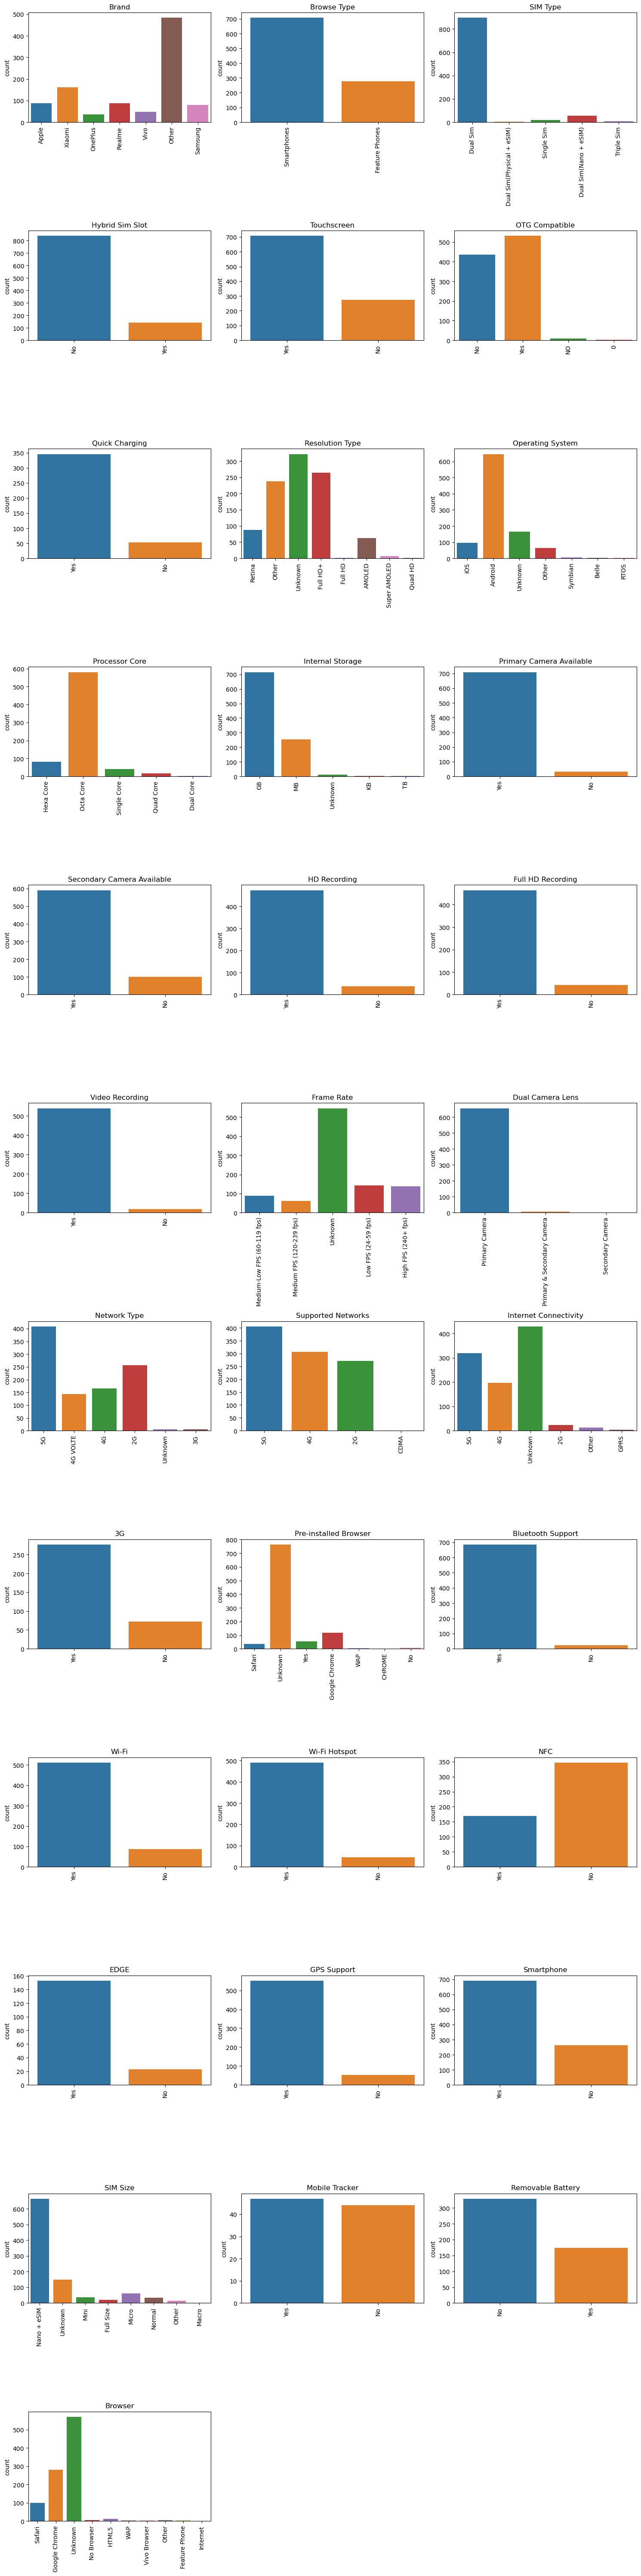

In [33]:
# obteniendo el nombre de las columnas categoricas
cat_vars = df.select_dtypes(include='object').columns.tolist()
cat_vars.remove('Map Support')  # se excluye la columna Map Support

# creando lienzo con subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando countplot por cada columna
for i, var in enumerate(cat_vars):
    top_values = df[var].value_counts().index
    filtered_df = df[df[var].isin(top_values)]
    sns.countplot(x=var, data=filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')
    axs[i].tick_params(axis='x', rotation=90)

# removiendo espacios innecesarios
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando espacio entre subplots
fig.tight_layout()

# mostrando figura
plt.show()

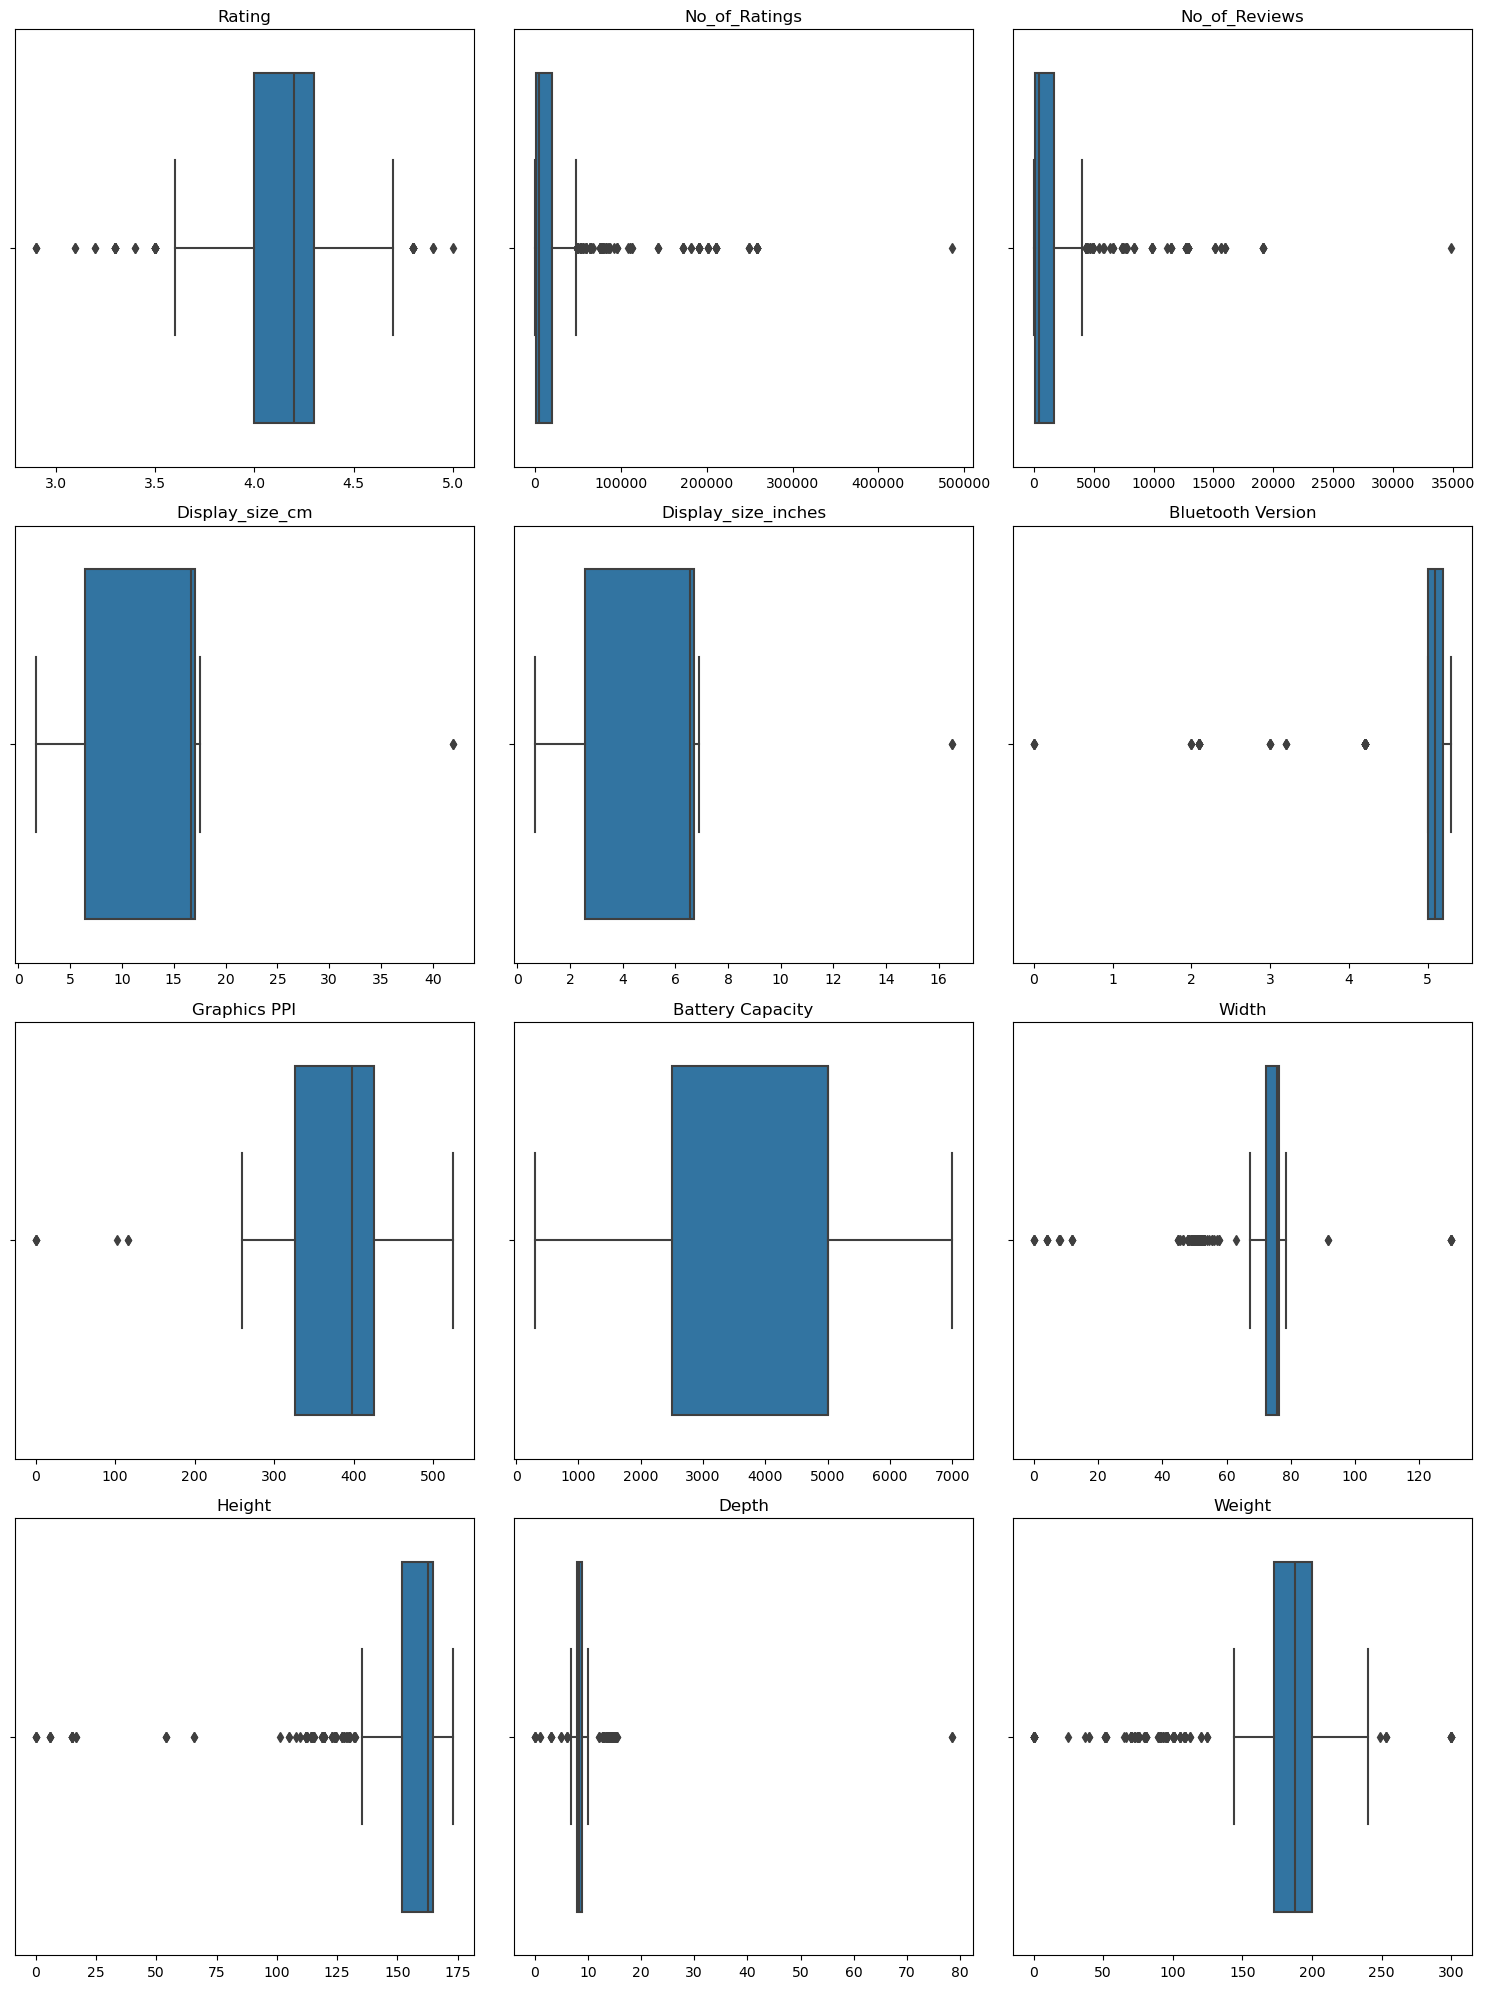

In [34]:
# obteniendo el nombre de las columnas numericas
num_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
num_vars.remove('Price')  # se excluye la columna Price

# creando lienzo con subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando grafico de caja por cada columna
for i, var in enumerate(num_vars):
    sns.boxplot(x=df[var], ax=axs[i])
    axs[i].set_title(var)
    axs[i].set_xlabel('')

# removiendo subplots extras
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# adjustando espacio entre subplots
fig.tight_layout()

# mostrando figura
plt.show()

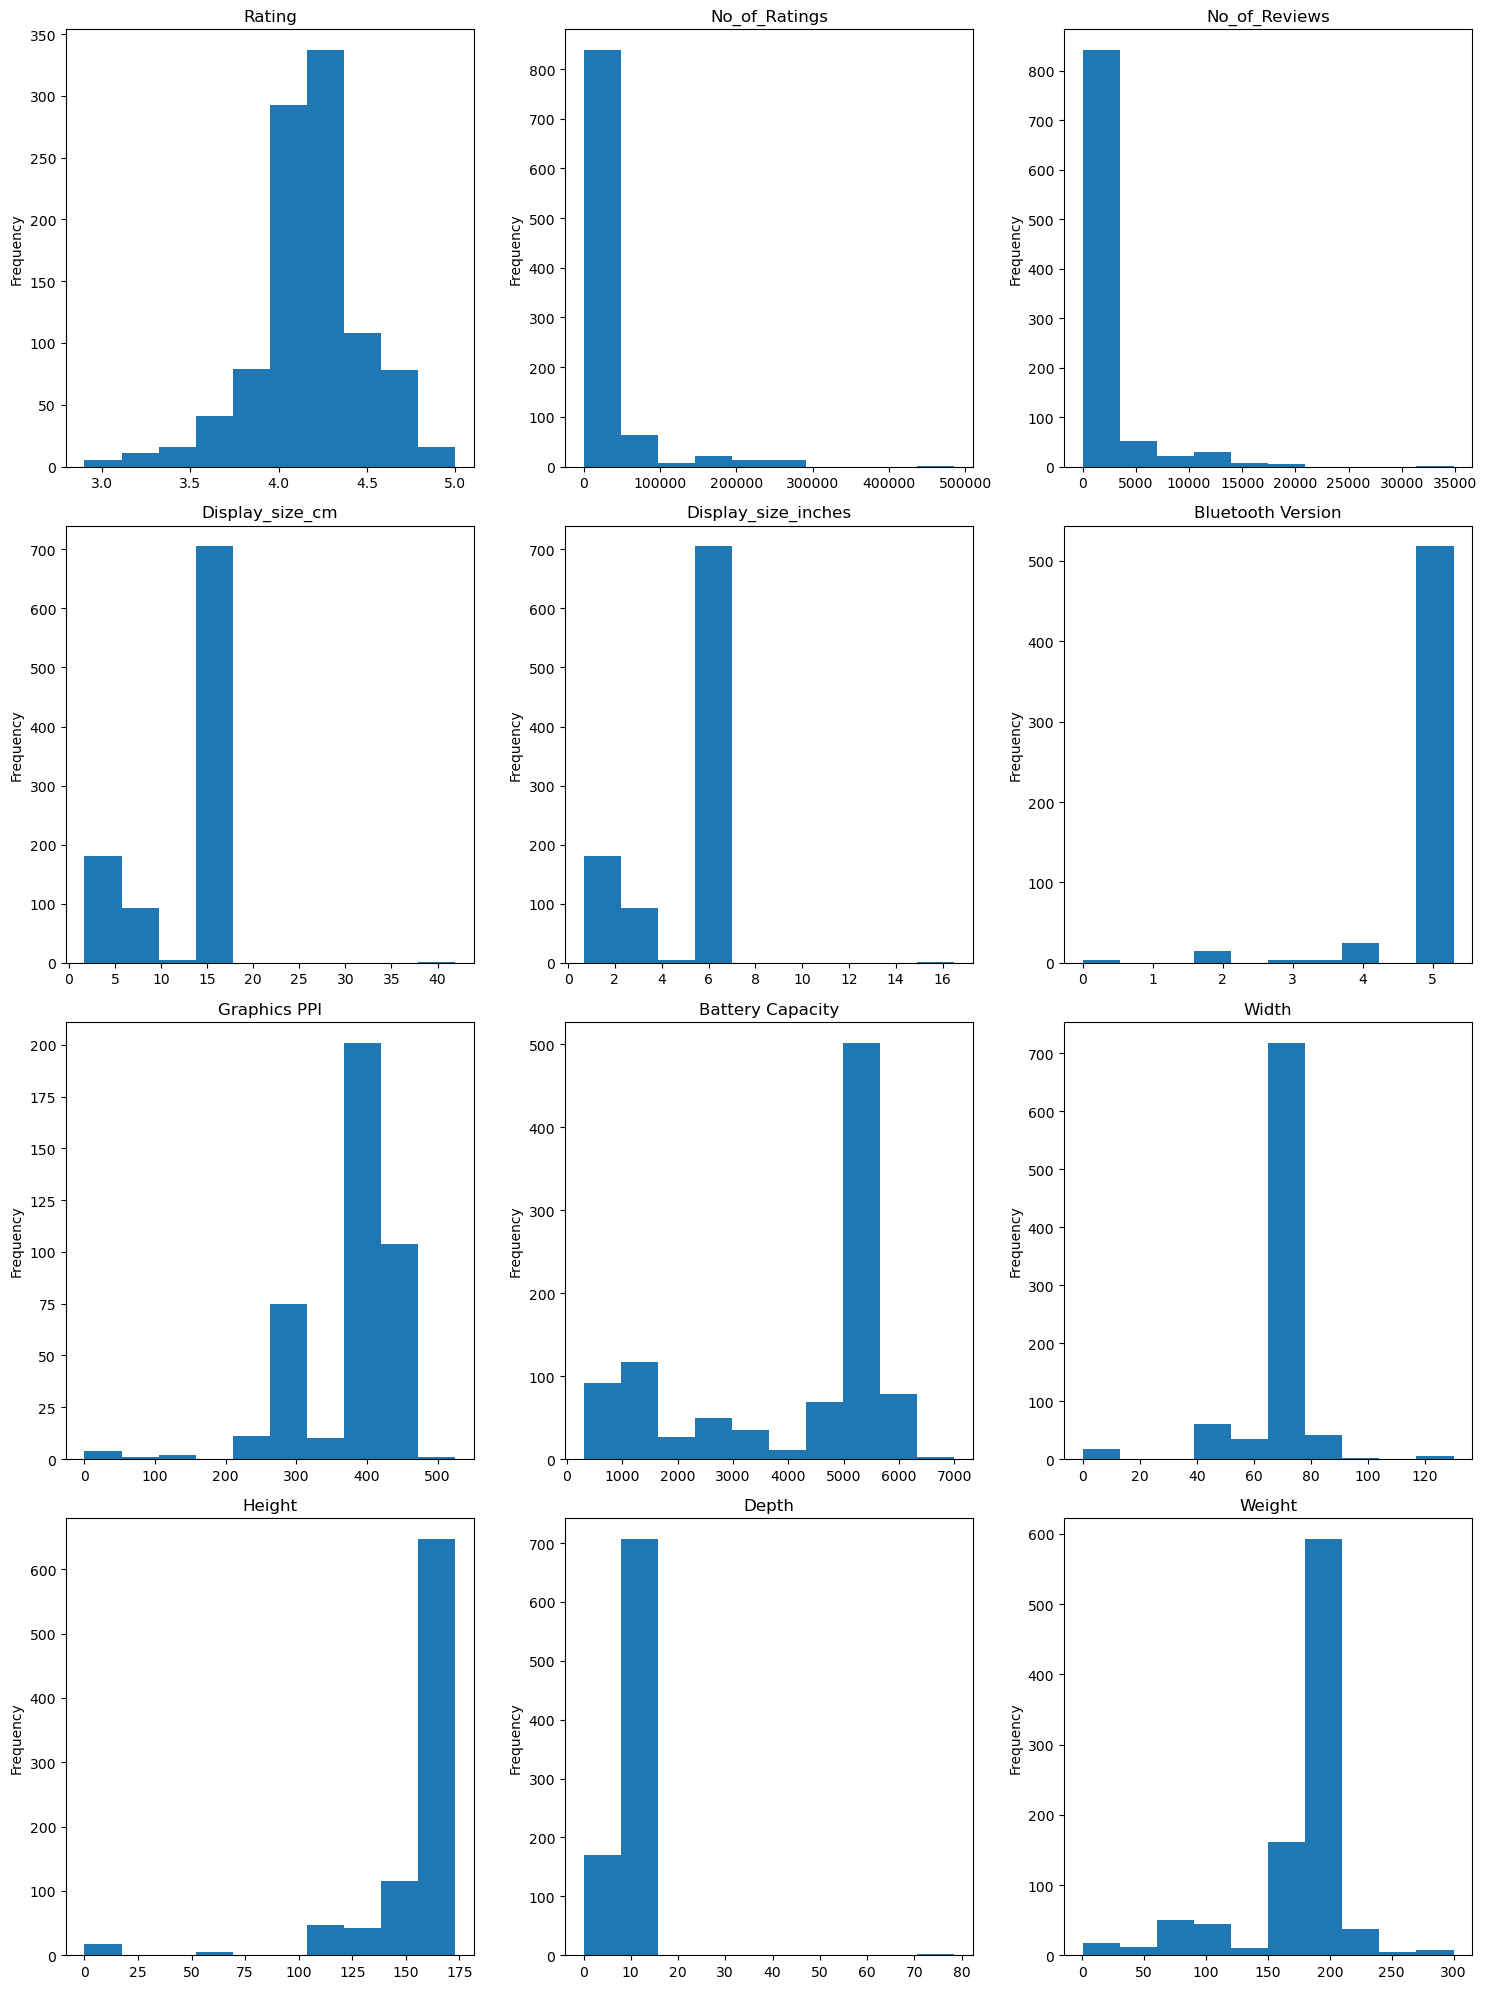

In [35]:
# obteniendo el nombre de las columnas numericas
int_vars = df.select_dtypes(include=['int', 'float']).columns.tolist()
int_vars.remove('Price')

# creando lienzo con subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# creando historigrama por cada columna
for i, var in enumerate(int_vars):
    df[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# removiendo subplots extras
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# adjustando espacio entre subplots
fig.tight_layout()

# mostrando figura
plt.show()

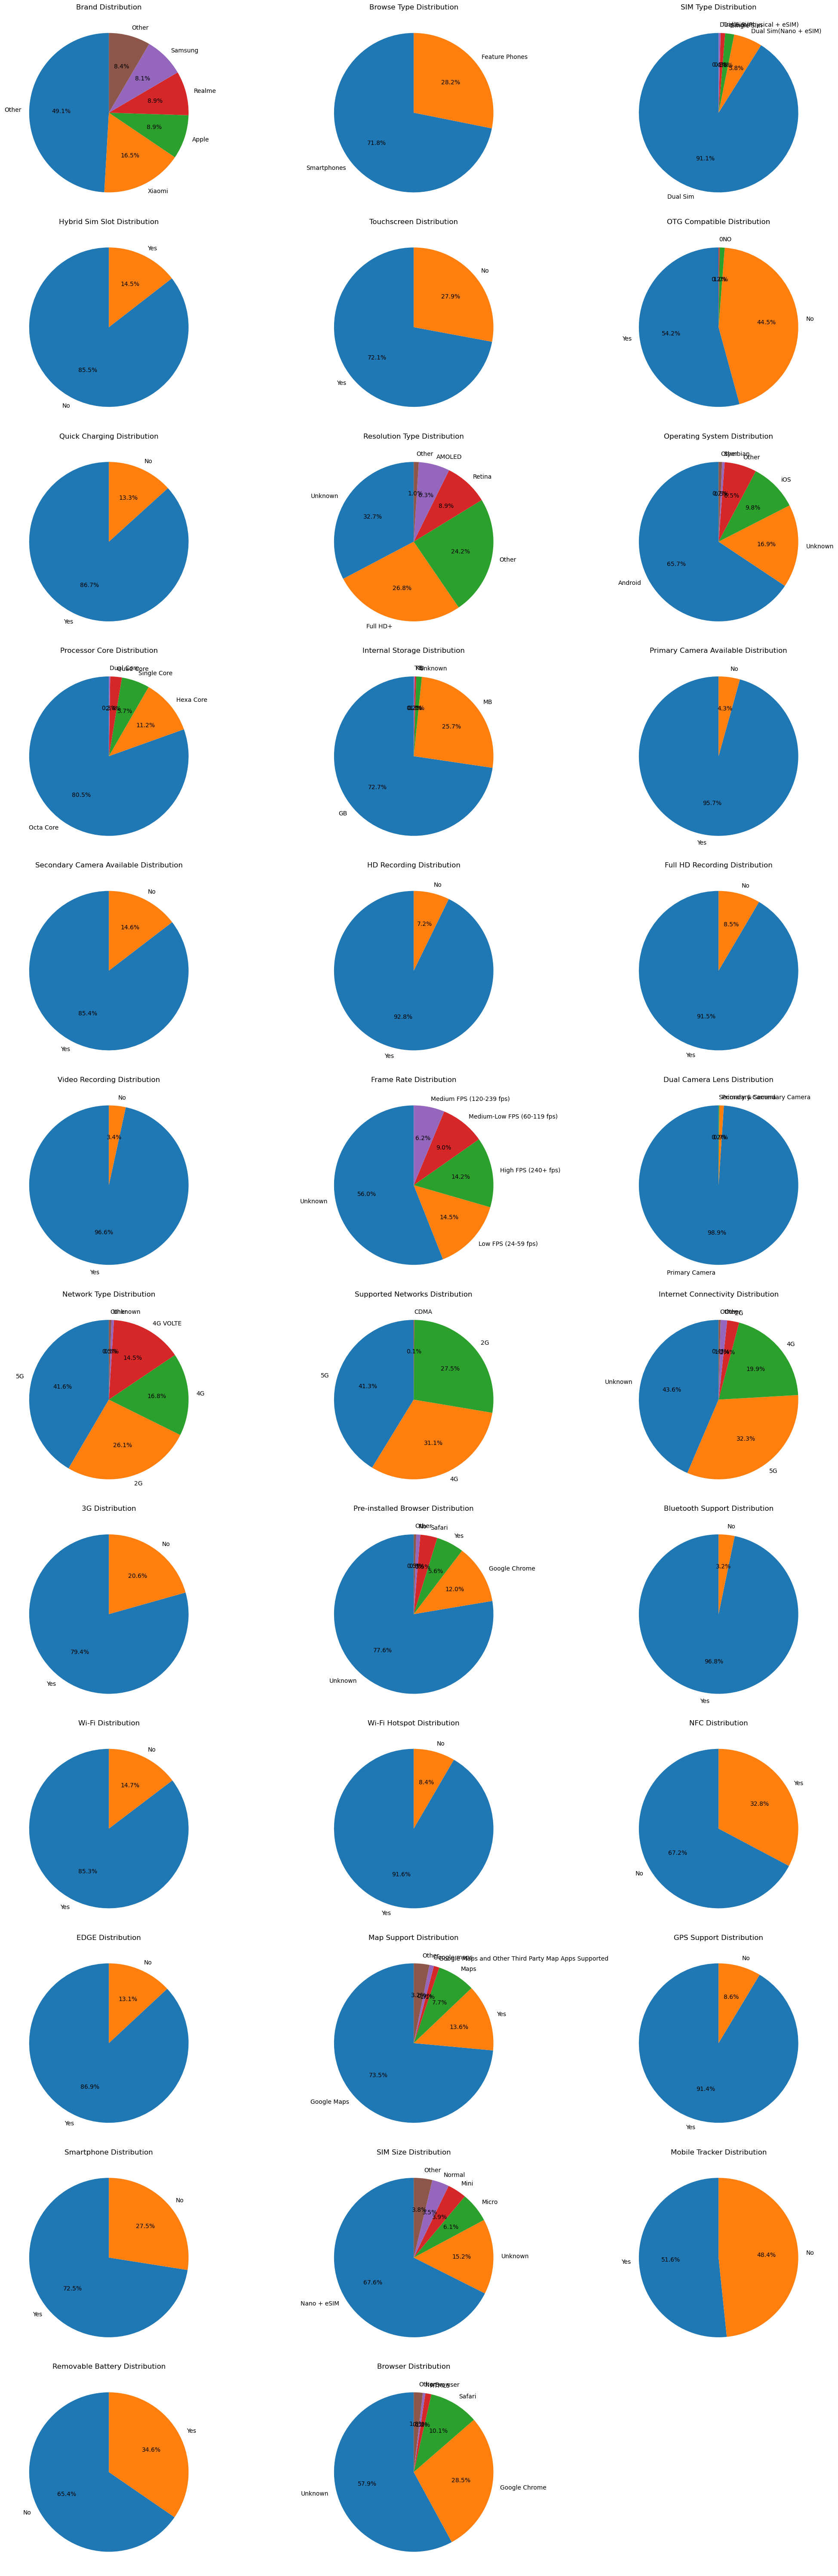

In [36]:
# especificando el numero maximo de categorias
max_categories = 5

# obteniendo columnas categoricas
cat_cols = [col for col in df.columns if col != 'Country' and df[col].dtype == 'object']

# creando lienzo con subplots
num_cols = len(cat_cols)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 5*num_rows))

# aplanando el axs array para indexar mas facilmente
axs = axs.flatten()

# creando grafico de torta por cada columna
for i, col in enumerate(cat_cols):
    if i < len(axs):  
        # contando las categorias por columna
        cat_counts = df[col].value_counts()

        # agrupar categorías más allá de max_categories como "Otros"
        if len(cat_counts) > max_categories:
            cat_counts_top = cat_counts[:max_categories]
            cat_counts_other = pd.Series(cat_counts[max_categories:].sum(), index=['Other'])
            cat_counts = pd.concat([cat_counts_top, cat_counts_other])

        # creacion de grafico
        axs[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)
        axs[i].set_title(f'{col} Distribution')

# removiendo subplots extras
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# ajustando espacio entre subplots
fig.tight_layout()

# mostrando figura
plt.show()

## Procesamiento del dataframe 2

In [37]:
# removiendo columnas que poseen muchos valores Unknown
df.drop(columns = ['Browser', 'Pre-installed Browser', 'Frame Rate', 'Resolution Type'], inplace=True)
df.head()

,Brand,Price,Rating,No_of_Ratings,No_of_Reviews,Browse Type,SIM Type,Hybrid Sim Slot,Touchscreen,OTG Compatible,Quick Charging,Display_size_cm,Display_size_inches,Operating System,Processor Core,Internal Storage,Primary Camera Available,Secondary Camera Available,HD Recording,Full HD Recording,Video Recording,Dual Camera Lens,Network Type,Supported Networks,Internet Connectivity,3G,Bluetooth Support,Bluetooth Version,Wi-Fi,Wi-Fi Hotspot,NFC,EDGE,Map Support,GPS Support,Smartphone,SIM Size,Mobile Tracker,Removable Battery,Graphics PPI,Battery Capacity,Width,Height,Depth,Weight
0,Apple,52499,4.7,259109.0,12745.0,Smartphones,Dual Sim,No,Yes,No,Yes,15.49,6.10,iOS,Hexa Core,GB,Yes,Yes,Yes,Yes,Yes,Primary Camera,5G,5G,5G,Yes,Yes,5.0,Yes,Yes,Yes,Yes,Maps,Yes,Yes,Nano + eSIM,Yes,No,460.0,3240,71.50,146.7,7.65,173.0
1,Xiaomi,6499,4.1,78642.0,4449.0,Smartphones,Dual Sim,No,Yes,Yes,Yes,16.56,6.52,Android,Octa Core,GB,Yes,Yes,Yes,Yes,Yes,Primary Camera,4G VOLTE,4G,4G,Yes,Yes,5.0,Yes,Yes,No,Yes,Google Maps,Yes,Yes,Nano + eSIM,NaN,No,NaN,5000,76.75,164.9,9.09,192.0
2,OnePlus,17196,4.4,110949.0,7728.0,Smartphones,Dual Sim,No,Yes,No,NaN,16.74,6.59,Android,Octa Core,GB,NaN,NaN,NaN,NaN,NaN,NaN,5G,5G,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Nano + eSIM,NaN,No,NaN,5000,76.75,164.9,9.09,192.0
3,Realme,15999,4.3,2633.0,220.0,Smartphones,Dual Sim,No,Yes,Yes,NaN,17.07,6.72,Android,Octa Core,GB,Yes,Yes,Yes,Yes,Yes,Primary Camera,5G,5G,5G,Yes,Yes,5.2,Yes,Yes,No,Yes,Google Maps,Yes,Yes,Nano + eSIM,NaN,NaN,391.0,5000,76.00,165.7,7.89,190.0
4,Realme,14999,4.4,13807.0,988.0,Smartphones,Dual Sim,No,Yes,Yes,NaN,17.07,6.72,Android,Octa Core,GB,Yes,Yes,Yes,Yes,Yes,Primary Camera,5G,5G,5G,Yes,Yes,5.2,Yes,Yes,No,Yes,Google Maps,Yes,Yes,Nano + eSIM,NaN,NaN,391.0,5000,76.00,165.7,7.89,190.0


In [38]:
# chequeando valores nulos por columnas
null = df.isnull().sum() * 100 / df.shape[0]
null[null > 0].sort_values(ascending=False)

Mobile Tracker                90.752033
EDGE                          82.113821
3G                            64.532520
Quick Charging                59.451220
Graphics PPI                  58.434959
Map Support                   55.081301
Removable Battery             48.882114
Full HD Recording             48.373984
HD Recording                  48.069106
NFC                           47.560976
Wi-Fi Hotspot                 45.528455
Video Recording               43.292683
Bluetooth Version             42.174797
Wi-Fi                         39.024390
GPS Support                   38.617886
Dual Camera Lens              32.621951
Secondary Camera Available    29.674797
Bluetooth Support             27.947154
Processor Core                26.626016
Primary Camera Available      24.695122
Height                        11.077236
Depth                         10.670732
Width                         10.569106
Weight                         4.471545
Smartphone                     3.150407


In [39]:
# obteniendo las columnas con mas del 20% de valores nulos
columns_to_remove = null[null > 20].index

# eliminando las columnas con mas del 20% de valores nulos
df = df.drop(columns=columns_to_remove)
df.head()

,Brand,Price,Rating,No_of_Ratings,No_of_Reviews,Browse Type,SIM Type,Hybrid Sim Slot,Touchscreen,OTG Compatible,Display_size_cm,Display_size_inches,Operating System,Internal Storage,Network Type,Supported Networks,Internet Connectivity,Smartphone,SIM Size,Battery Capacity,Width,Height,Depth,Weight
0,Apple,52499,4.7,259109.0,12745.0,Smartphones,Dual Sim,No,Yes,No,15.49,6.10,iOS,GB,5G,5G,5G,Yes,Nano + eSIM,3240,71.50,146.7,7.65,173.0
1,Xiaomi,6499,4.1,78642.0,4449.0,Smartphones,Dual Sim,No,Yes,Yes,16.56,6.52,Android,GB,4G VOLTE,4G,4G,Yes,Nano + eSIM,5000,76.75,164.9,9.09,192.0
2,OnePlus,17196,4.4,110949.0,7728.0,Smartphones,Dual Sim,No,Yes,No,16.74,6.59,Android,GB,5G,5G,Unknown,Yes,Nano + eSIM,5000,76.75,164.9,9.09,192.0
3,Realme,15999,4.3,2633.0,220.0,Smartphones,Dual Sim,No,Yes,Yes,17.07,6.72,Android,GB,5G,5G,5G,Yes,Nano + eSIM,5000,76.00,165.7,7.89,190.0
4,Realme,14999,4.4,13807.0,988.0,Smartphones,Dual Sim,No,Yes,Yes,17.07,6.72,Android,GB,5G,5G,5G,Yes,Nano + eSIM,5000,76.00,165.7,7.89,190.0


In [40]:
# rellenando con la mediana los valores faltantes
df['Height'].fillna(df['Height'].median(), inplace=True)
df['Depth'].fillna(df['Depth'].median(), inplace=True)
df['Width'].fillna(df['Width'].median(), inplace=True)
df['Weight'].fillna(df['Weight'].median(), inplace=True)

In [41]:
# eliminando los registros nulos de las demas columnas
df.dropna(inplace=True)

## Label Encoding

In [42]:
# loop para obtener cada categoria de cada columna categorica
for col in df.select_dtypes(include=['object']).columns:
    # imprime el nombre de la columna y valores unicos
    print(f"{col}: {df[col].unique()}")

Brand: ['Apple' 'Xiaomi' 'OnePlus' 'Realme' 'Vivo' 'Other' 'Samsung']
Browse Type: ['Smartphones' 'Feature Phones']
SIM Type: ['Dual Sim' 'Dual Sim(Physical + eSIM)' 'Single Sim'
 'Dual Sim(Nano + eSIM)' 'Triple Sim']
Hybrid Sim Slot: ['No' 'Yes']
Touchscreen: ['Yes' 'No']
OTG Compatible: ['No' 'Yes' 'NO' '0']
Operating System: ['iOS' 'Android' 'Unknown' 'Other' 'Symbian' 'RTOS' 'Belle']
Internal Storage: ['GB' 'MB' 'Unknown' 'KB' 'TB']
Network Type: ['5G' '4G VOLTE' '4G' '2G' '3G']
Supported Networks: ['5G' '4G' '2G' 'CDMA']
Internet Connectivity: ['5G' '4G' 'Unknown' '2G' 'Other' 'GPRS']
Smartphone: ['Yes' 'No']
SIM Size: ['Nano + eSIM' 'Unknown' 'Mini' 'Full Size' 'Micro' 'Normal' 'Other'
 'Macro']


In [43]:
# loop para obtener cada categoria de cada columna categorica
for col in df.select_dtypes(include=['object']).columns:

    # creando LabelEncoder
    label_encoder = preprocessing.LabelEncoder()

    # entrenando el Encoder con los valores unicos
    label_encoder.fit(df[col].unique())

    # transformando la columna
    df[col] = label_encoder.transform(df[col])

    # imprime el nombre de la columna y valores unicos
    print(f"{col}: {df[col].unique()}")

Brand: [0 6 1 3 5 2 4]
Browse Type: [1 0]
SIM Type: [0 2 3 1 4]
Hybrid Sim Slot: [0 1]
Touchscreen: [1 0]
OTG Compatible: [2 3 1 0]
Operating System: [6 0 5 2 4 3 1]
Internal Storage: [0 2 4 1 3]
Network Type: [4 3 2 0 1]
Supported Networks: [2 1 0 3]
Internet Connectivity: [2 1 5 0 4 3]
Smartphone: [1 0]
SIM Size: [4 7 3 0 2 5 6 1]


## Análisis de correlación

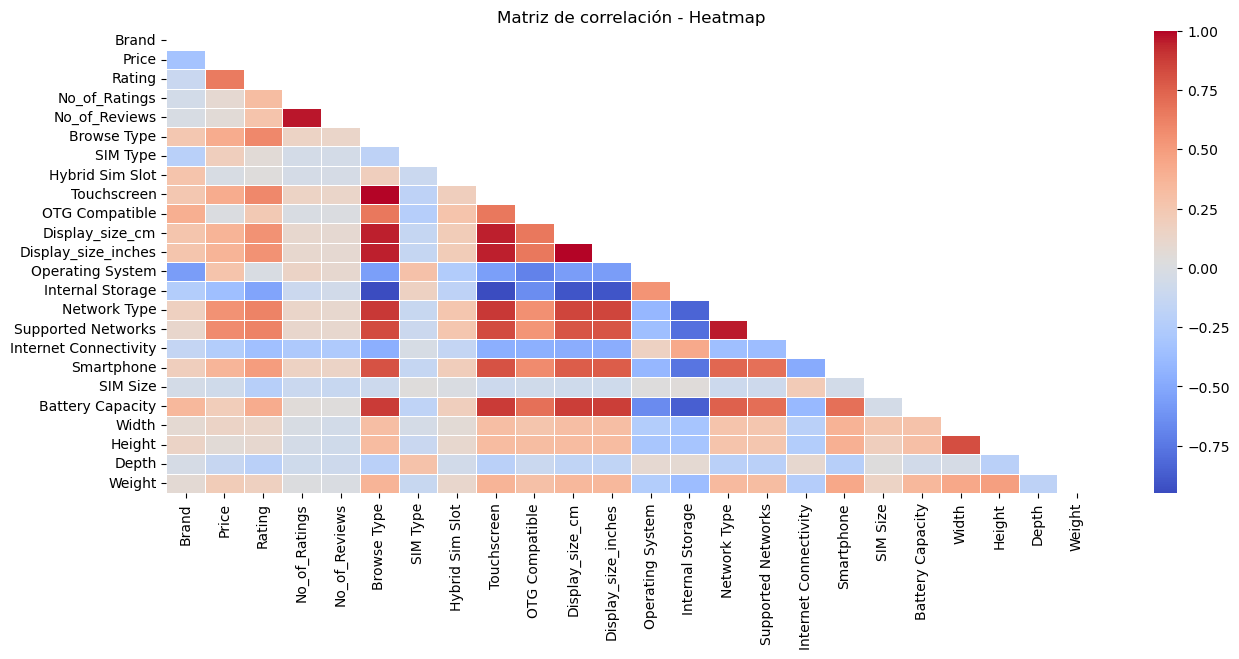

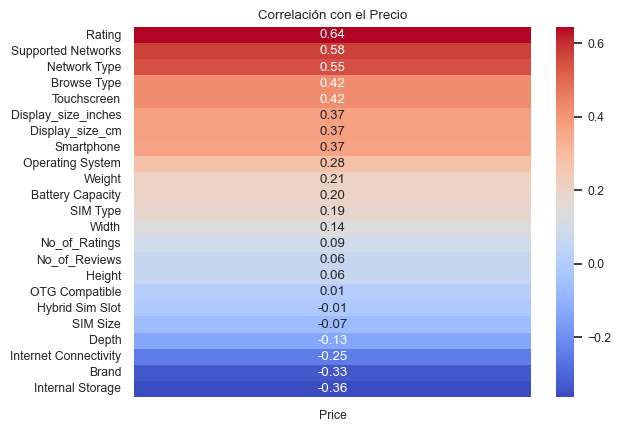

In [44]:
correlation_matrix = df.corr()
# grafico 1
plt.figure(figsize=(15, 6))
matrix = np.triu(correlation_matrix.corr())
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f', mask=matrix)
plt.title("Matriz de correlación - Heatmap")
plt.show()

# grafico 2
# ordenamos los valores de la correlacion
target_corr = correlation_matrix['Price'].drop('Price')
target_corr_sorted = target_corr.sort_values(ascending=False)
# creamos un mapa de calor con las correlaciones y la variable objetivo
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title("Correlación con el Precio")
plt.show()

In [45]:
# removiendo columnas con alto nivel de correlacion
df.drop(columns = ['No_of_Ratings', 'Display_size_inches', 'Browse Type'], inplace=True)
df.head()

,Brand,Price,Rating,No_of_Reviews,SIM Type,Hybrid Sim Slot,Touchscreen,OTG Compatible,Display_size_cm,Operating System,Internal Storage,Network Type,Supported Networks,Internet Connectivity,Smartphone,SIM Size,Battery Capacity,Width,Height,Depth,Weight
0,0,52499,4.7,12745.0,0,0,1,2,15.49,6,0,4,2,2,1,4,3240,71.50,146.7,7.65,173.0
1,6,6499,4.1,4449.0,0,0,1,3,16.56,0,0,3,1,1,1,4,5000,76.75,164.9,9.09,192.0
2,1,17196,4.4,7728.0,0,0,1,2,16.74,0,0,4,2,5,1,4,5000,76.75,164.9,9.09,192.0
3,3,15999,4.3,220.0,0,0,1,3,17.07,0,0,4,2,2,1,4,5000,76.00,165.7,7.89,190.0
4,3,14999,4.4,988.0,0,0,1,3,17.07,0,0,4,2,2,1,4,5000,76.00,165.7,7.89,190.0


## Train Test Split

In [46]:
X = df.drop('Price', axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=0)

## Removiendo Outliers con Z-Score

In [47]:
# seleccionando columnas a la cual se le removeran outliers
columns_to_keep_outliers = ['Rating', 'Bluetooth Version']

# definiendo el umbral de detección de valores atípicos
threshold = 3

# creando mascara para seleccionar las columnas numericas
numerical_columns = X_train.select_dtypes(include=['int', 'float']).columns

# recorriendo las columnas numéricas y eliminando los valores atípicos de las columnas
for col in numerical_columns:
    if col not in columns_to_keep_outliers:
        z_scores = np.abs(stats.zscore(X_train[col]))
        outlier_indices = np.where(z_scores > threshold)[0]
        X_train = X_train.drop(X_train.index[outlier_indices])
        y_train = y_train.drop(y_train.index[outlier_indices])

## Modelos predictivos

### Decision Tree Regressor

In [48]:
# creando Decision Tree Regressor
dtree = DecisionTreeRegressor()

# Definiendo los hiperparámetros a ajustar y sus valores
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'random_state': [0, 42]
}

# creando GridSearchCV
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='neg_mean_squared_error')

# entrenando el GridSearchCV con la data de entrenamiento
grid_search.fit(X_train, y_train)

# imprimiendo los mejores hiperparametros
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 0}


In [49]:
# ajustando el Decision Tree Regressor 
dtree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features='sqrt', min_samples_leaf=2, min_samples_split=6)
# entrenando el modelo
dtree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, random_state=0)

In [50]:
# creando las predicciones
y_pred = dtree.predict(X_test)

### Evaluación del modelo

In [51]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 4571.846832786726
MAPE is 0.6026405060790033
MSE is 92193827.57156709
R2 score is 0.8975862587403577
RMSE score is 9601.761691042278


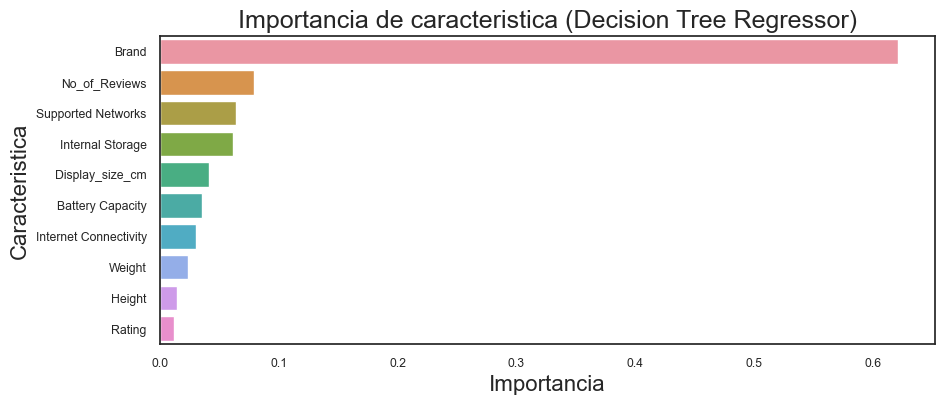

In [52]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,4))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Importancia de caracteristica (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importancia', fontsize=16)
plt.ylabel ('Caracteristica', fontsize=16)
plt.show()

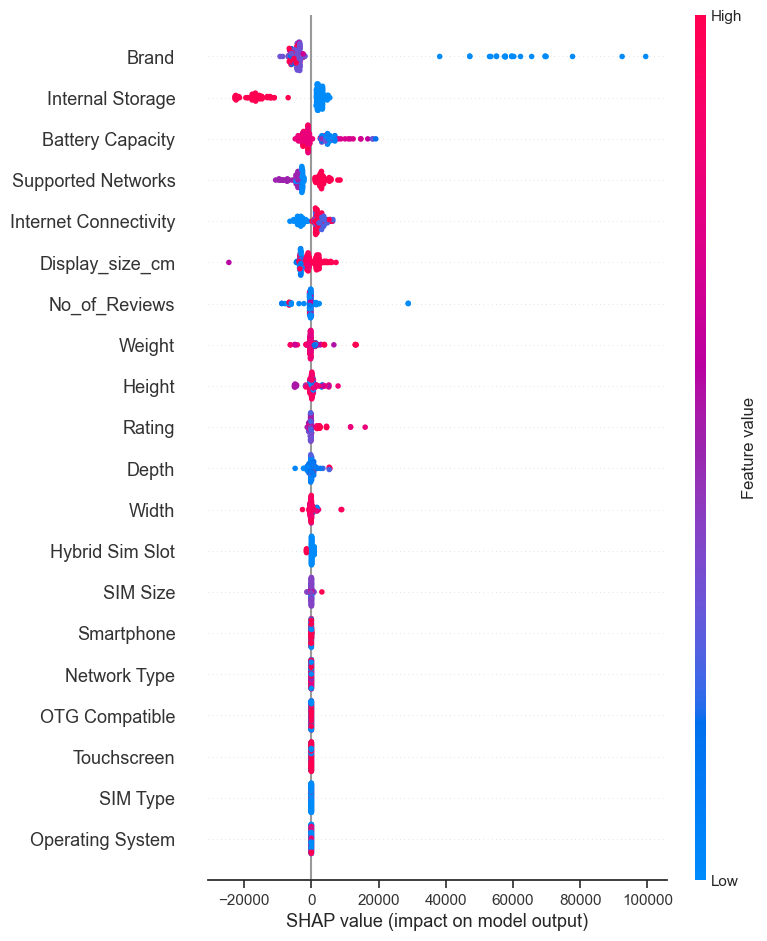

In [53]:
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

### XGBoost Regressor

In [54]:
# creando XGBoost Regressor
xgb_model = xgb.XGBRegressor()

# definiendo hiperparametros para el XGBoost
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0],
    'random_state': [0, 42]

}
# creando GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='r2')

# entrenando GridSearchCV con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# imprimiendo mejores hiperparametros
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'random_state': 42, 'subsample': 0.8}


In [55]:
# ajustando el modelo
xgb_model = xgb.XGBRegressor(max_depth=7, learning_rate=0.1, n_estimators=300, random_state=42, subsample=0.8)
# entrenando el modelo
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [56]:
# creando predicciones
y_pred = xgb_model.predict(X_test)

### Evaluación del modelo

In [57]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
r2 = metrics.r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 1842.2585104665447
MAPE is 0.2682091763039513
MSE is 18348556.797289904
R2 score is 0.9796174603243717
RMSE score is 4283.521541592841


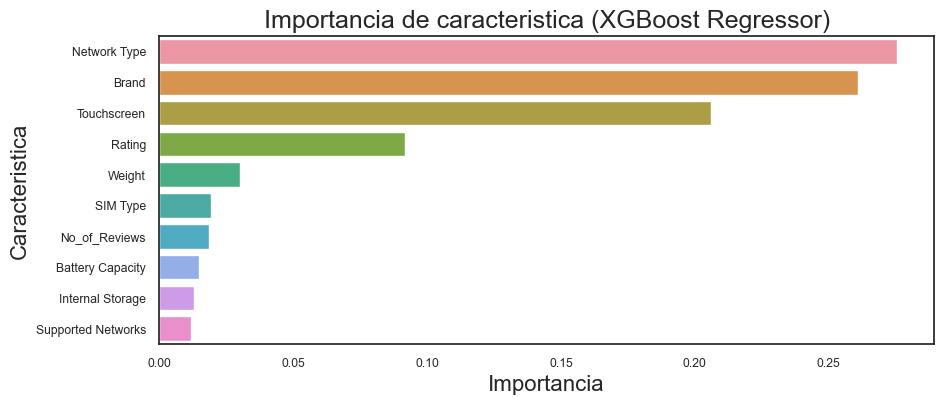

In [58]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": xgb_model.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,4))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Importancia de caracteristica (XGBoost Regressor)', fontsize=18)
plt.xlabel ('Importancia', fontsize=16)
plt.ylabel ('Caracteristica', fontsize=16)
plt.show()

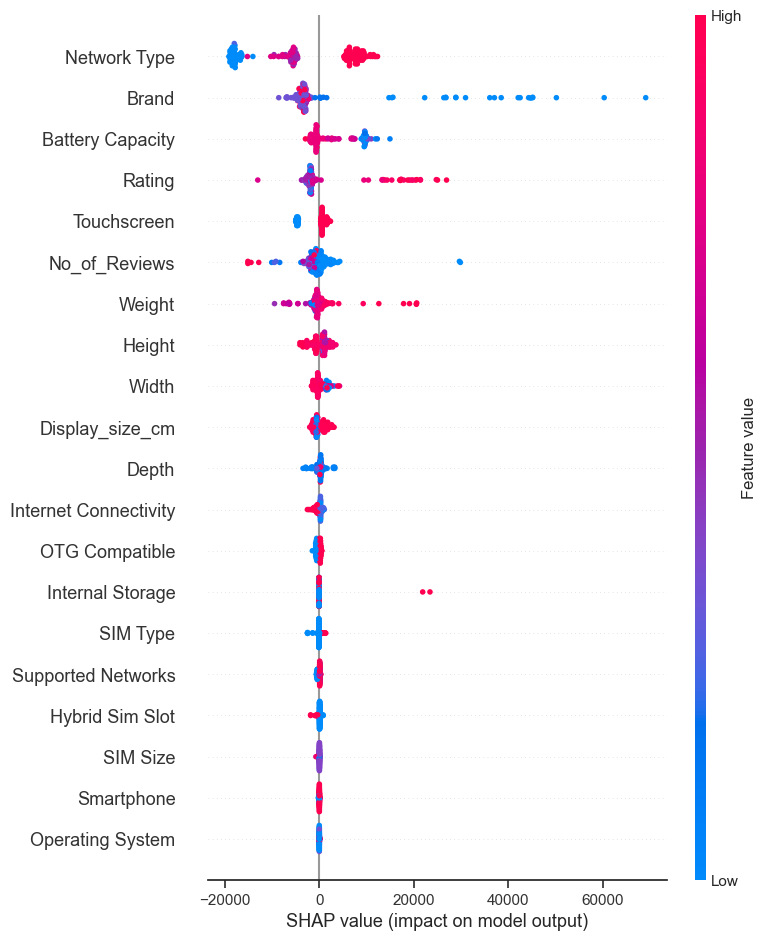

In [59]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)